In [28]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
#Importing the required libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [31]:
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [33]:
from sklearn.metrics import accuracy_score , classification_report

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
#Loading the dataset

In [36]:
h1n1 = pd.read_csv("h1n1_vaccine_prediction.csv")

In [37]:
h1n1.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [38]:
h1n1.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [39]:
features = h1n1.iloc[:,:-1]
labels = h1n1.iloc[:,[33]]


In [40]:
features

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0


In [41]:
labels

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0
26705,0


In [42]:
#Checking The Shape of dataset

In [43]:
features.shape

(26707, 33)

In [44]:
#There are 33 features so either we should do PCA or feature selection
#PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models.

In [45]:
features.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children'],
      dtype='object')

In [46]:
labels.shape

(26707, 1)

In [47]:
labels.columns

Index(['h1n1_vaccine'], dtype='object')

In [48]:
#Checking the Datatype

In [49]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [50]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  26707 non-null  int64
dtypes: int64(1)
memory usage: 208.8 KB


In [51]:
#Checking for duplicates in dataset

In [52]:
features.duplicated().sum()

0

In [53]:
#There no duplicates in dataset

In [54]:
#Checking for missing values in dataset

In [55]:
features.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [56]:
#There are lots of missing value so we need to impute them

In [57]:
labels.isnull().sum()

h1n1_vaccine    0
dtype: int64

In [58]:
#Filling the missing values

In [59]:
# For float fill missing values with the mean

In [60]:
features = features.fillna(features.mean())
features = round(features)

In [61]:
# For string fill missing value with 'No Category'

In [62]:
features = features.fillna('No Category')

In [63]:
features.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [64]:
#Finding the unique values of features

In [65]:
# For Datatype = float

In [66]:
print("h1n1_worry")
print(features.h1n1_worry.unique())

h1n1_worry
[1. 3. 2. 0.]


In [67]:
print("h1n1_awareness")
print(features.h1n1_awareness.unique())

h1n1_awareness
[0. 2. 1.]


In [68]:
print("antiviral_medication")
print(features.antiviral_medication.unique())

antiviral_medication
[0. 1.]


In [69]:
print("contact_avoidance")
print(features.contact_avoidance.unique())

contact_avoidance
[0. 1.]


In [70]:
print("bought_face_mask")
print(features.bought_face_mask.unique())

bought_face_mask
[0. 1.]


In [71]:
print("wash_hands_frequently")
print(features.wash_hands_frequently.unique())

wash_hands_frequently
[0. 1.]


In [72]:
print("avoid_large_gatherings")
print(features.avoid_large_gatherings.unique())

avoid_large_gatherings
[0. 1.]


In [73]:
print("reduced_outside_home_cont")
print(features.reduced_outside_home_cont.unique())

reduced_outside_home_cont
[1. 0.]


In [74]:
print("avoid_touch_face")
print(features.avoid_touch_face.unique())

avoid_touch_face
[1. 0.]


In [75]:
print("dr_recc_h1n1_vacc")
print(features.dr_recc_h1n1_vacc.unique())

dr_recc_h1n1_vacc
[0. 1.]


In [76]:
print("dr_recc_seasonal_vacc")
print(features.dr_recc_seasonal_vacc.unique())

dr_recc_seasonal_vacc
[0. 1.]


In [77]:
print("chronic_medic_condition")
print(features.chronic_medic_condition.unique())

chronic_medic_condition
[0. 1.]


In [78]:
print("cont_child_undr_6_mnths")
print(features.cont_child_undr_6_mnths.unique())

cont_child_undr_6_mnths
[0. 1.]


In [79]:
print("is_health_worker")
print(features.is_health_worker.unique())

is_health_worker
[0. 1.]


In [80]:
print("has_health_insur")
print(features.has_health_insur.unique())

has_health_insur
[1. 0.]


In [81]:
print("is_h1n1_vacc_effective")
print(features.is_h1n1_vacc_effective.unique())

is_h1n1_vacc_effective
[3. 5. 4. 2. 1.]


In [82]:
print("is_h1n1_risky")
print(features.is_h1n1_risky.unique())

is_h1n1_risky
[1. 4. 3. 2. 5.]


In [83]:
print("sick_from_h1n1_vacc")
print(features.sick_from_h1n1_vacc.unique())

sick_from_h1n1_vacc
[2. 4. 1. 5. 3.]


In [84]:
print("is_seas_vacc_effective")
print(features.is_seas_vacc_effective.unique())

is_seas_vacc_effective
[2. 4. 5. 3. 1.]


In [85]:
print("is_seas_risky")
print(features.is_seas_risky.unique())

is_seas_risky
[1. 2. 4. 3. 5.]


In [86]:
print("sick_from_seas_vacc")
print(features.sick_from_seas_vacc.unique())

sick_from_seas_vacc
[2. 4. 1. 5. 3.]


In [87]:
print("no_of_adults")
print(features.no_of_adults.unique())

no_of_adults
[0. 2. 1. 3.]


In [88]:
print("no_of_children")
print(features.no_of_children.unique())

no_of_children
[0. 3. 2. 1.]


In [89]:
# For Datatype = object

In [90]:
print("age_bracket")
print(features.age_bracket.unique())

age_bracket
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']


In [91]:
print("qualification")
print(features.qualification.unique())

qualification
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']


In [92]:
print("race")
print(features.race.unique())

race
['White' 'Black' 'Other or Multiple' 'Hispanic']


In [93]:
print("sex")
print(features.sex.unique())

sex
['Female' 'Male']


In [94]:
print("income_level")
print(features.income_level.unique())

income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']


In [95]:
print("marital_status")
print(features.marital_status.unique())

marital_status
['Not Married' 'Married' 'No Category']


In [96]:
print("housing_status")
print(features.housing_status.unique())

housing_status
['Own' 'Rent' 'No Category']


In [97]:
print("employment")
print(features.employment.unique())

employment
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']


In [98]:
print("census_msa")
print(features.census_msa.unique())

census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [99]:
#Encoding the object

In [100]:
from sklearn.preprocessing import MinMaxScaler , LabelEncoder


In [101]:
enc = LabelEncoder()

In [102]:
features.age_bracket = enc.fit_transform(features.age_bracket)
features.qualification = enc.fit_transform(features.qualification)
features.race = enc.fit_transform(features.race)
features.sex = enc.fit_transform(features.sex)
features.income_level = enc.fit_transform(features.income_level)
features.marital_status = enc.fit_transform(features.marital_status)
features.housing_status = enc.fit_transform(features.housing_status)
features.employment =  enc.fit_transform(features.employment)
features.census_msa = enc.fit_transform(features.census_msa)

In [103]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [104]:
features.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,3,0,2,2,1,2,2,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,3,1,2,2,2,0,0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,2,1,0,0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,3,0,2,2,2,2,1,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,4,3,0,0,0,1,0,0,1.0,0.0


EXPLORATORY DATA ANALYSIS

In [105]:
features.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,2.057513,2.570300,0.406223,0.953795,0.932190,1.145542,0.984161,0.833489,0.887558,0.538922
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,1.435626,0.923226,0.491136,1.113444,0.970936,0.526582,1.052723,0.823313,0.749980,0.924918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000


Visualising categorical data

In [106]:
features.h1n1_worry.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

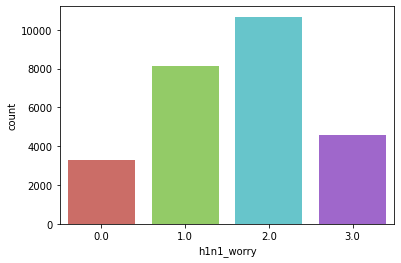

In [107]:
sns.countplot('h1n1_worry',data =features ,palette = 'hls')


Most of the people are somewhat concerned about h1n1 vaccine

In [108]:
features.h1n1_awareness.value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

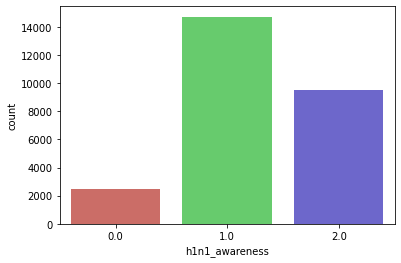

In [109]:
sns.countplot('h1n1_awareness',data =features ,palette = 'hls')


Almost 90% of people have little or lots of knowledge about h1n1 vaccine

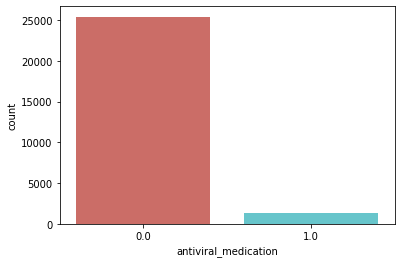

In [110]:
sns.countplot('antiviral_medication',data =features ,palette = 'hls')


Almost non of the people took antiviral medications

In [111]:
features.contact_avoidance.value_counts()

1.0    19436
0.0     7271
Name: contact_avoidance, dtype: int64

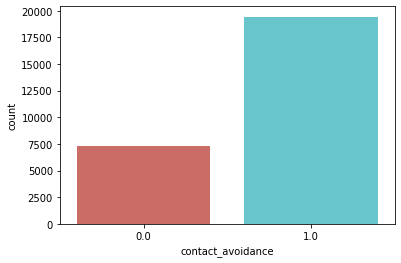

In [112]:
sns.countplot('contact_avoidance',data =features ,palette = 'hls')

70% of people have avoided contact with people with symptoms

In [113]:
features.bought_face_mask.value_counts()

0.0    24866
1.0     1841
Name: bought_face_mask, dtype: int64

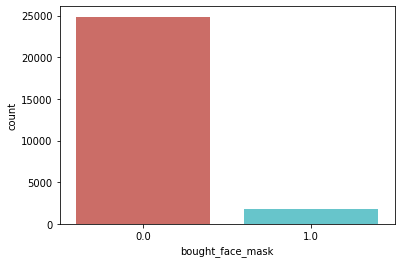

In [114]:
sns.countplot('bought_face_mask',data =features ,palette = 'hls')

Very few people have bought a face mask

In [115]:
features.wash_hands_frequently.value_counts()

1.0    22057
0.0     4650
Name: wash_hands_frequently, dtype: int64

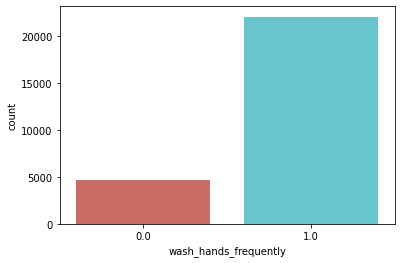

In [116]:
sns.countplot('wash_hands_frequently',data =features ,palette = 'hls')

80% of people have frequently washed their hands

In [117]:
features.avoid_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: avoid_large_gatherings, dtype: int64

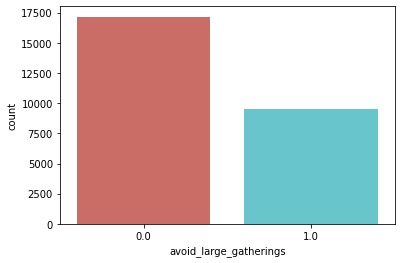

In [118]:
sns.countplot('avoid_large_gatherings',data =features ,palette = 'hls')

In [119]:
features.reduced_outside_home_cont.value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

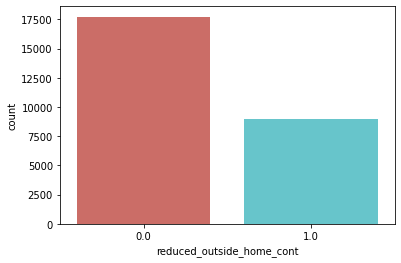

In [120]:
sns.countplot('reduced_outside_home_cont',data =features ,palette = 'hls')

In [121]:
features.avoid_touch_face.value_counts()

1.0    18129
0.0     8578
Name: avoid_touch_face, dtype: int64

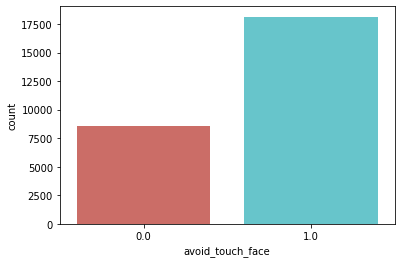

In [122]:
sns.countplot('avoid_touch_face',data =features ,palette = 'hls')

70% of people have avoided touching eyes, nose, or mouth

In [123]:
features.dr_recc_h1n1_vacc.value_counts()


0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

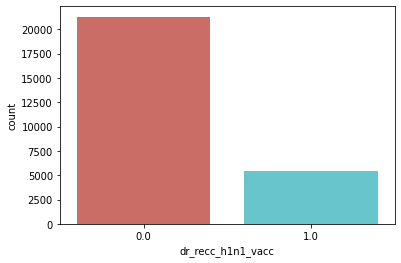

In [124]:
sns.countplot('dr_recc_h1n1_vacc',data =features ,palette = 'hls')

Doctors recommended the h1n1 vaccine to only 20% of people

In [125]:
features.dr_recc_seasonal_vacc.value_counts()


0.0    18613
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

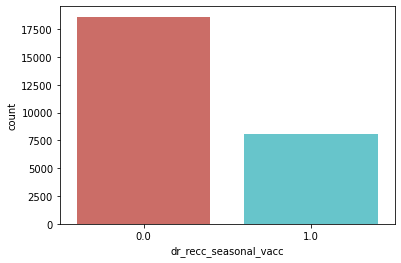

In [126]:
sns.countplot('dr_recc_seasonal_vacc',data =features ,palette = 'hls')

Doctors recommended seasonal vaccine to only 30% of people

In [127]:
features.chronic_medic_condition.value_counts()

0.0    19417
1.0     7290
Name: chronic_medic_condition, dtype: int64

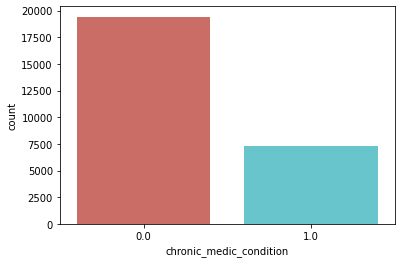

In [128]:
sns.countplot('chronic_medic_condition',data =features ,palette = 'hls')

In [129]:
features.cont_child_undr_6_mnths.value_counts()

0.0    24569
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

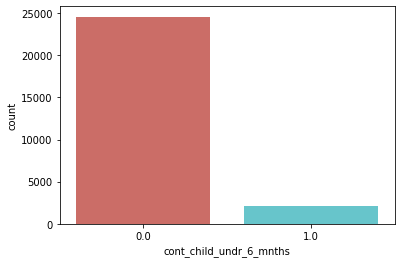

In [130]:
sns.countplot('cont_child_undr_6_mnths',data =features ,palette = 'hls')

Very few people had close contact with child under 6 months

In [131]:
features.is_health_worker.value_counts()

0.0    23808
1.0     2899
Name: is_health_worker, dtype: int64

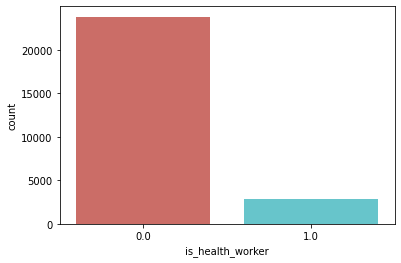

In [132]:
sns.countplot('is_health_worker',data = features,palette ='hls')

Very few people work in healthcare

In [133]:
features.has_health_insur.value_counts()

1.0    24971
0.0     1736
Name: has_health_insur, dtype: int64

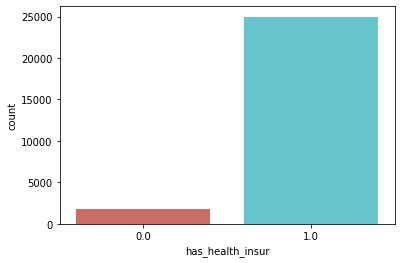

In [134]:
sns.countplot('has_health_insur',data = features , palette = 'hls')

In [135]:
features.is_h1n1_vacc_effective.value_counts()

4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

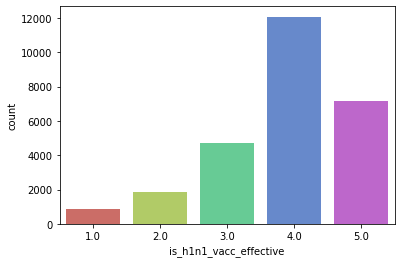

In [136]:
sns.countplot('is_h1n1_vacc_effective',data = features , palette = 'hls')

Most of the people think h1n1 is somewhat effective

In [137]:
features.is_h1n1_risky.value_counts()

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: is_h1n1_risky, dtype: int64

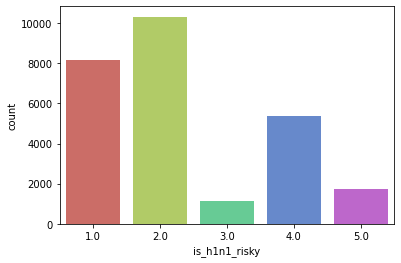

In [138]:
sns.countplot('is_h1n1_risky',data = features , palette = 'hls')

Most people believe the h1n1 vaccine has somewhat low or very low risk

In [139]:
features.sick_from_h1n1_vacc.value_counts()

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

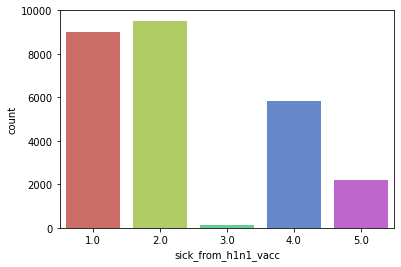

In [140]:
sns.countplot('sick_from_h1n1_vacc',data = features , palette = 'hls')

Most people are not at all worried or not very worried of getting sick from h1n1 vaccine

In [141]:
#Visualising labels

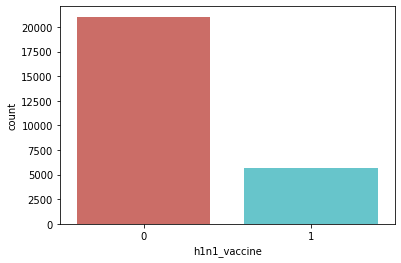

In [142]:
sns.countplot('h1n1_vaccine',data = labels , palette = 'hls')

FEATURE SCALING

In [143]:
from sklearn.preprocessing import MinMaxScaler , LabelEncoder

In [144]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [145]:
features = pd.DataFrame(features)
col_name = ['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children']
features.columns = col_name

FEATURE SELECTION

In [146]:
#Independent and target variables

In [147]:
x = features
y = labels

In [148]:
x

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.25,1.000000,0.0,0.666667,1.0,0.5,0.666667,1.0,0.000000,0.0
1,0.000037,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.00,1.000000,1.0,0.666667,1.0,1.0,0.000000,0.0,0.000000,0.0
2,0.000075,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.50,1.000000,1.0,0.000000,1.0,0.5,0.000000,0.0,0.666667,0.0
3,0.000112,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.00,1.000000,0.0,0.666667,1.0,1.0,0.666667,0.5,0.000000,0.0
4,0.000150,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.00,1.000000,0.0,0.000000,0.0,0.5,0.000000,0.0,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.999850,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.00,1.000000,0.0,0.000000,1.0,0.5,0.666667,1.0,0.000000,0.0
26703,0.999888,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.50,1.000000,1.0,0.000000,1.0,1.0,0.000000,0.5,0.333333,0.0
26704,0.999925,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.00,1.000000,0.0,1.000000,1.0,0.5,0.333333,0.0,0.000000,0.0
26705,0.999963,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.00,0.333333,0.0,0.000000,0.0,1.0,0.000000,1.0,0.333333,0.0


In [149]:
y

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0
26705,0


In [150]:
#Splitting the data into training and testing data

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=100)

In [152]:
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test =st_x.transform(x_test)

In [153]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [154]:
y_pred =classifier.predict(x_test)

In [155]:
print(classifier.score(x_train,y_train))

0.8337434470953247


In [156]:
print(classifier.score(x_test,y_pred))

1.0


Confusion Matrix

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5991  346]
 [ 959  717]]


In [158]:
total = 5991+346+959+717
total

8013

In [159]:
accuracy = (5991+717)/total*100
accuracy

83.71396480718832

In [160]:
Misclassification = (346+959)/total *100
Misclassification

16.28603519281168